# Ch6. Beyond Born-Oppenheimer

## Install

In [1]:
#Installment
!pip install numpy
!pip install scipy



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import hermite
from math import factorial

## 6.1. Non-Born-Oppenheimer molecular Hamiltonian

Section 4에서 본 Born-Oppenheimer approximation을 다시보자. arbitrary coordinates에서의 Hamiltonian $\hat{H}$은 다음과 같이 표현할 수 있다.
 $$ \hat{H} = -\sum_I \frac{\nabla_{R_I}^{2}}{M_I} -\sum_i \frac{\nabla_{r_i}^{2}}{m_e} -\sum_{I} \sum_{i} \frac{Z_I e^2}{|R_I - r_i|} + \sum_i \sum_{j > i} \frac{e^2}{|r_i - r_j|} + \sum_I \sum_{J > I} \frac{Z_I Z_J e^2}{|R_I - R_J|} $$

where
- $\nabla_{r_i}^{2}$ and $\nabla_{R_I}^{2}$ are the second derivate operator with respect to the position coordinates for electrons and nuclei, that is, $\nabla_{R_I}^{2} = \frac{\partial^2}{\partial_{x_I}^{2}} + \frac{\partial^2}{\partial_{y_I}^{2}} + \frac{\partial^2}{\partial_{z_I}^{2}}$ and likewise for the p<sup>th</sup> electrons.
- $r_{ij} = \left|r_i - r_j\right|, r_{iI} = \left|r_i - R_I\right|, R_{IJ} = \left|R_I - R_J\right|$ are the distances between electrons $i$ and $j$, electron $i$ and nucles $I$, and the nuclei $I$ and $J$ determined by the Eulidean norm
- indexes with upper case such as $I, J$ represent nuclei, and indexes with lower case such as $i, j$ represent electrons
- $Z_I$ represents the atomic number of the nuclei

위에 표현한 Hamiltonian에서 conter-of-mass (COM) motion을 적용할 수 있는데 COM은 초기상태의 에너지를 바꾸지 않는다.이는 초기 상태는 양자화되어 있고 translation과 rotational motion에 대하여 변하지 않기 때문이다. 따라서 COM을 적용하면 분자의 핵은 아직 COM 근처에서 진동하거나 제자리 회전을 통해 움직일 수 있다.

이런 COM을 적용한 상태에서 BO approximation을 적용해보자. BO approximation은 핵의 움직임이 전자의 움직임과 결합되지 않는다고 가정한다. 이 말은 핵의 움직임에 대한 식 (회전과 진동) 그리고 전자의 움직임에 대한 식이 다음과 같다는 것을 의미한다.
$$
|\Psi_{total}(r,s,R)\rangle = \Psi_{rotational}(R)\Psi_{vibrational}(R)\Psi_{elec}(r,s:R) 
$$
여기에서 $R = {R_A,R_B,...,R_M}$는 핵의 좌표이고, $r = {r_p,r_i,r_j,...r_N}$은 전자의 좌표이다. 그리고 $s = {s_p,s_i,s_j,...,s_N}$는 spin 좌표이다. 위의 식에선 핵의 회전과 진동은 전자의 motion과 좌표의 영향을 받지 않고 핵의 좌표만의 식이고 전자의 wave function ($\Psi_{elec}(r,s;R)$)은 핵의 좌표(R)에 영향을 받는다는 것을 확인할 수 있다.

다음으로 non-BO method에선 전체 wave functin은 아직 rotation과 vibration 그리고 electronic energy level의 term으로 분리할 수 있지만 모든 에너지 level이 전자와 핵의 변수, spatial과 spin의 변수에 영향을 받는다.
$$
|\Psi_{total}(r,s,R)\rangle = \Psi_{rotational}(r,s,R,S)\Psi_{vibrational}(r,s,R,S)\Psi_{elec}(r,s,R,S) 
$$

위의 식에서는 핵의 회전과 진동을 전자의 wave function과 분리할 수 있으나 모든 식이 전자와 핵의 관한 변수에 영향을 받는다는 것을 확인할 수 있다.

따라서 BO approximation에선 핵의 자체 회전과 진동을 고려하지 않고 핵의 위치를 고정하고 전자에 관한 equation만을 반복하여 풀지만 non-BO method의 경우는 모든 입자의 interaction을 고려해야한다. 그리고 모든 입자의 움동을 고려하기 때문에 적은 수의 입자 모델에서 사용할 수 있다. 즉, 높은 정확도로 원자의 이온화 에너지(Rydberg states)나 excited state에서 회전과 진동을 높은 정확도로 알아내는 것에 사용된다. 이번 챕터에선 non-BO method가 어떻게 explicitly correlated Gaussian basis function(ECGs)를 활용하여 모든 입자의 interaction의 예상되는 power와 효과를 얻고 이를 이용하여 원자와 분자의 현상을 묘사하는지를 볼 것이다. 

### Internal Hamiltonian operator

N개의 입자가 있는(핵 하나와 N-1의 전자를 가진) 일반적인 non-relativistic 원자 시스템을 생각해보자.
먼저 arbitrary frame에서의 원자의 Hamiltonian을 internal Hamiltonian으로 변환하려면 arbitrary frame에서 COM motion을 완전히 분리해야 한다. 이 말은 COM에 새로운 좌표계를 설정하여 핵의 움직임을 무시한다는 것이다. 따라서 모든 입자가 같은 입장으로 처리되고 모든 입자가 아무런 제약조건 없이 자유롭게 공간을 움직이는 것이 허용되는 internal Cartesian coordinate frame(CCF)을 정의한다.

arbitrary CCF에서 internal CCF로의 좌표 변환은 다음 그림에 묘사되어 있다.

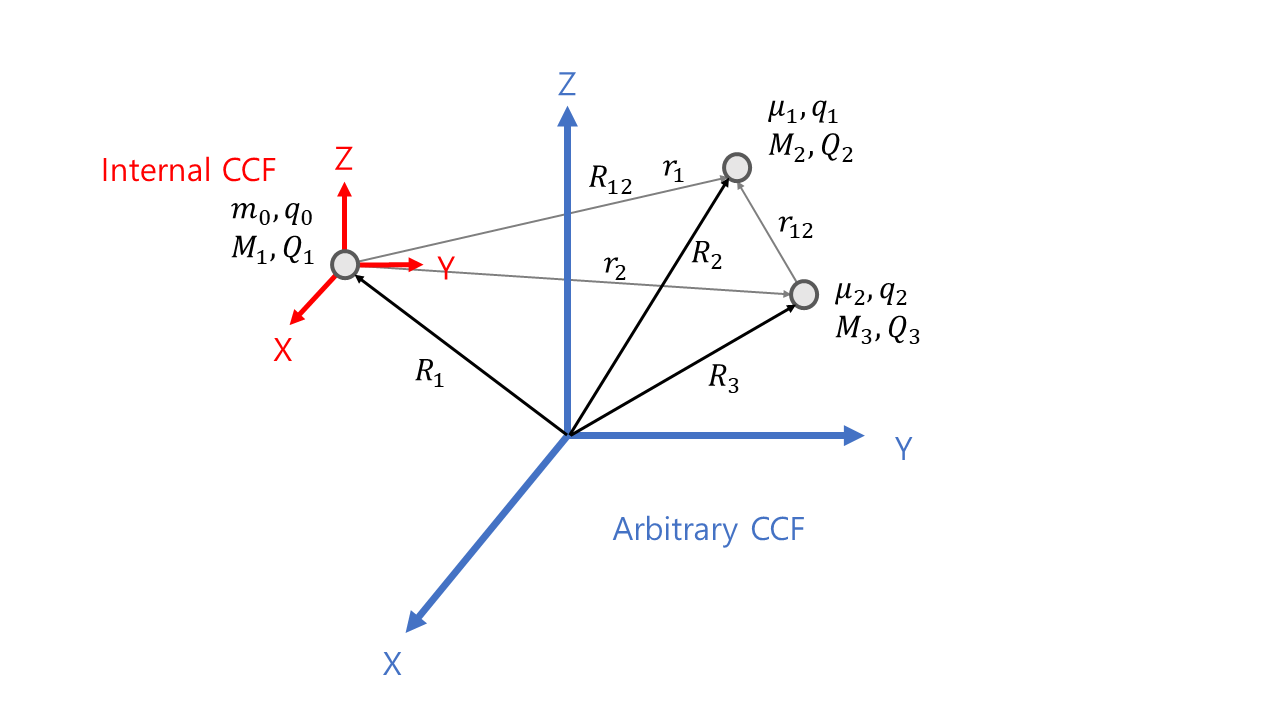


좌표변환하여 얻은 internal Hamiltonian은 다음과 같다.
$$ \hat{H}_{int} = -\frac{1}{2} \left( \sum_i^n \frac{1}{\mu_i} \nabla_{r_i}^{2} + \sum_{i\ne j}^n \frac{1}{m_o}\nabla'_{r_i}\nabla_{r_j} \right) +\sum_{i=1}^n \frac{q_0q_i}{r_i}+ \sum_{i>j=1}^n \frac{q_iq_j}{r_{ij}} $$

다음 표는 internal Hamiltonian의 term의 표이다.

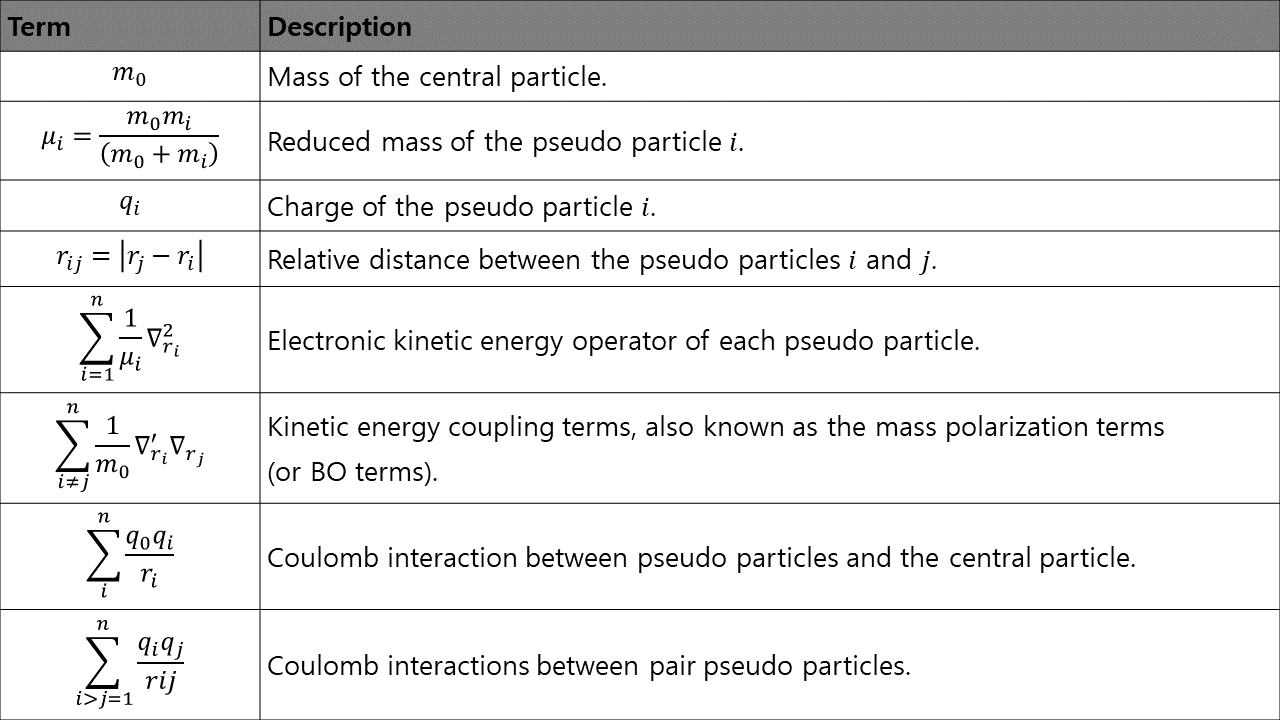

모든 term을 확인하면 BO와 거의 유사하나 핵의 kinetic energy가 다른 입자에 영향을 받는 것이 확인된다.

#### Explicitly correlated all-particle Gaussian functions

다음으론 non-BO method에서 ECGs를 사용하여 total wave function을 다음과 같이 표현한다.


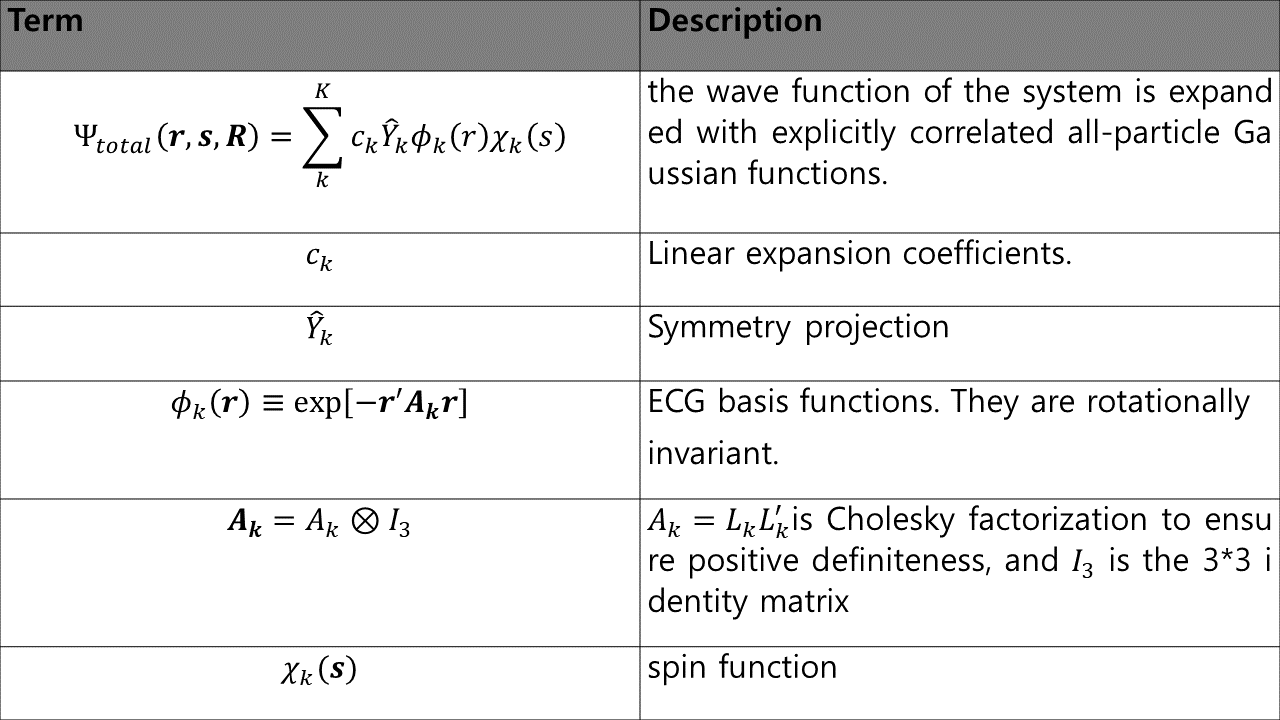

그리고 non-BO method도 variational principle을 사용하고 에너지 최소화(Energy minimization) 과정을 거친다.

### Energy minimization

arbitrary Hamiltonian $\hat{H}$의 eigenvalue를 얻으려면 Rayleigh-Ritz variational scheme(variation method)을 사용해야한다.
$$
\epsilon(a, c) = min_(a,c)\frac{c^{*}H(a)c}{c^{*}S(a)c}
$$
여기에서 H(a)와 S(a)는 각각 Hamiltonian과 K * K overlap matirix이다. H(a)와 S(a)는 ECGs의 basis-set에 제한된 nonlinear parameter의 함수이다. 그리고 a는 이럼 함수의 parameter의 set이고 c는 wave function의 linear expansion coeffineients이다. 


이제  가우시안의 nonlinear parameter를 지키는 에너지의 analytic gradient을 secular equation $(H - \epsilon S)C = 0$의 식으로부터 구하고 구현한다. 

먼저 위의 식을 얻으려면 time independant schrodinger equation을 봐야한다.
$$
H|\psi \rangle = E|\psi \rangle
$$
위 식에서 조건은 $|psi\rangle$이 0이 아니여야 한다. 위 식을 eigenvalue를 구하는 식으로 바꾸면 다음과 같다.
$$
(H-EI)|\psi \rangle = 0
$$
하지만 이것은 모든 basis가 orthonormal해야 한다는 가정이 있다. 만약 orthonormal하지 않으면 다음과 같이 overlap matrix를 사용하여 나타낼 수 있다.
$$
(H-\epsilon S) |\psi\rangle = 0
$$
where : 
- $S_{i,j} =\langle \psi_i | \psi_j \rangle$
- $H_{i,j} = \langle \psi_i |H| \psi_j \rangle$

그리고 $|\psi \rangle$을 coeffidence vector $C = \{c_1, c_2, ..., c_n \}$으로 생각하면 다음과 같이 쓸 수 있다.
$$
(H-\epsilon S)C = 0
$$
위 식을 풀어서 쓰면 다음과 같은 식들이 나온다.
$$
c_1(H_{11} - \epsilon S_{11}) + c_2(H_{12} - \epsilon S_{12}) + ... + c_n(H_{1n} - \epsilon S_{1n})
$$
$$
c_1(H_{21} - \epsilon S_{21}) + c_2(H_{22}-\epsilon S_{22}) + ... + c_n(H_{2n}-\epsilon S_{2n})
$$
$$
...
$$

다음으로 얻은 식을 미분하면
$$
d(H - \epsilon S)C = (dH)c - (d\epsilon)Sc - \epsilon(dS)c + (H - \epsilon S)dc
$$
위 식에 $c^*$을 좌측에 곱해주면 우리가 잘 아는 Hellmann-Feynman theorem을 얻는다.
$$
d\epsilon = c^*(dH - \epsilon dS)c
$$
이 표현식을 얻기 위해, secular equation을 사용했고 wave function이 normalize 되었다고 가정했다. 즉, $c^{*}Sc = 1$. 

## 6.2. Vibrational frequency analysis calculations

BO 근사를 사용하지 않는다면 분자의 에너지는 전자기적인 에너지와 핵의 운동도 포함하여야 하므로, 진동, 회전에 의한 에너지도 포함하게 된다. 
$$E_{total}=E_{rotational}+E_{vibrational}+E_{elec}$$
분자의 진동은, 원자와 원자사이에 전자기력에 의한 Bonding에 의한 진동으로, 입자와 스프링의 역학인 조화진동자로 모델링할 수 있다. 만약 진동에너지가 너무 커진다면 조화진동자를 사용할 수 없다. 또한 조화진동자에서 사용한는 Normal mode 또한 사용할 수 없다는것은 알아두어야한다. 즉 진동이 커질수록 이러한 계산방법은 오차가 커질것이다.
 
이러한 점을 염두해 두고 간단한 케이스의 이원자분자를 고려해보자.  

### Modeling the vibrational-rotational levels of a diatomic molecule

#### 1. Rotational E 
이원자분자의 Rotatinal 에너지는 아래와같이 이산적인 값들의 조합으로 표현된다. 
$$E_{rotatinal} = \frac{J(J+1)\hbar^2}{2MR^2_e}$$
여기서 각 notation 은 아래와 같다. 
- J : 각운동량 양자수
- $R_e$ : 평형거리
- M : Reduced mass : M =: $\frac{M_A M_B}{M_A + M_B}$
회전하지 않는 분자에 대해서는 J 가 0이다 (따라서 BO근사를 하게되면 , rotation에 의한 에너지 항이 0이 된다.)

#### 2.Vibration 에 의한 potential 에너지 
앞서 정의한대로 Vibraion 은 조화진동자로 모델링 하기로 하였다. 따라서 potential 에너지는 아래와같이 근사할 수 있다. 
$$E_{pot}(x) = \frac{1}{2}kx^2$$
- x : 평형점으로부터의 변위

에너지를 이렇게 정의하게되면 마찬가지로 양자조화진동자 모델도 그대로 적용하여 에너지를 아래와같이 간단하게 표현 할 수 있다.
$$E_\nu = h\omega(\nu + \frac{1}{2})$$
- $\nu$ : Vibrational 양자수 
- $ \omega = \sqrt{\frac{k}{M}}$

그리고 이에 대응되는 양자조화진동자의 양자상태는 아래와 같다.
$$\psi_\nu(x) = \frac{1}{\sqrt{2^{\nu}\nu!}} \cdot (\frac{M\omega}{\pi \hbar})^{1/4} \cdot H_{\nu}(\sqrt{\frac{M\omega}{\hbar}}x) \cdot e^{-M\omega x^2 /2\hbar}$$
- $H_{\nu}(z) = (-1)^\nu (e^{z^2}) \frac{d^\nu}{dz^\nu} (e^{-z^2}) \quad [\nu 차의 \, Hermite \, polynomial]$

이 Hermite polynomial 은 아래와같은 Reculsion Relation을 만족한다. 
$$zH_\nu (z) = zH_{\nu-1} (z) + \frac{1}{2}H_{\nu+1} (z) $$

이 관계를 이용해 첫 3개의 Polynomial을 구해보면 아래와 같다. 
- $H_0(z) = 1$
- $H_1(z) = 2z$
- $H_2(z) = 4z^2-2$

이 솔루션을 이제 파이썬을 이용해 그려볼것이다. 

우선 정규화 상수를 하나로 묶고, 사용자지정함수를 통해 정의한다. 
$$N(\nu) = (\sqrt{\pi} 2^\nu \nu!)^{-1/2}$$

In [ ]:
def N(v):
    return 1./np.sqrt(np.sqrt(np.pi)*(2**v)*factorial(v))

그리고 함수부분도 마찬가지로 정의한다.

In [ ]:
def Psi(v, x):
  return N(v)*hermite(v)(x)*np.exp(-0.5*x**2)

그리고 앞서 정의한 포텐셜 과 각 주양자수별 상태를 그리는 함수를 정의해주고 그림을 그려본다. 위는 확률진폭을 나타내고, 아래는 확률진폭의 제곱인 확률밀도함수를 그려주게된다. 

In [ ]:
def plot(n):
  fig, ax = plt.subplots(figsize=(n+1,n+1))

  # Range of x
  xmax = np.sqrt(2*n+1)
  x = np.linspace(-xmax, xmax, 1000)

  for v in range(n):
    # plot potential energy function 0.5*x**2
    ax.plot(x,0.5*x**2,color='black')
    
    # plot spatial probabilities psi squared for each energy level
    ax.plot(x,Psi(v,x) + v + 0.5)
    
    # add lines and labels
    ax.axhline(v + 0.5, color='gray', linestyle='-') 
    ax.text(xmax, 1.2*(v+0.5), f"v={v}")

  ax.set_xlabel('x')
  ax.set_ylabel('probablity amplitude')
  plt.title("probablity amplitude")

def plot_p(n):
  fig, ax = plt.subplots(figsize=(n+1,n+1))

  # Range of x
  xmax = np.sqrt(2*n+1)
  x = np.linspace(-xmax, xmax, 1000)

  for v in range(n):
    # plot potential energy function 0.5*x**2
    ax.plot(x,0.5*x**2,color='black')
    
    # plot spatial probabilities psi squared for each energy level
    ax.plot(x,Psi(v,x)**2 + v + 0.5)
    
    # add lines and labels
    ax.axhline(v + 0.5, color='gray', linestyle='-') 
    ax.text(xmax, 1.2*(v+0.5), f"v={v}")

  ax.set_xlabel('x')
  ax.set_ylabel('probablity density')
  plt.title("probablity density")  

plot(5)
plot_p(5)

여기서 진동에너지가 더 커지면, 즉 평형점부터의 변위가 점점 커지면 포텐셜은 비조화 진동자로 근사를 하여야한다. 

이경우는 아래와같이 2차term 까지만 사용한다. 
$$E_{vib}(v)=h\omega(v+\frac{1}{2}) - \chi h \omega (v+\frac{1}{2})^2$$
- $\chi$ : 비조화성 상수 (얼마난 비조화이지를 나타내는 상수)

여기서 양자수(v)가 증가할수록 에너지 간격은 좁아진다

핵간거리 $R$ 로 표현되는 회전에너지는 마찬가지로 평형점 $R_e$ 에 대해서 테일러전개 할 수 있다. 
$$E_{rot} =\frac{J(J+1)\hbar^2}{2MR^2} \simeq \frac{J(J+1)\hbar^2}{2MR^2_e} + \frac{J^2(J+1)^2\hbar^4}{2M^2kR^6_e} + \frac{J^3(J+1)^3\hbar^6}{2M^3k^2R^10_e} + \cdots$$ 
- k : 두 원자를 묶어두는 힘에 대응되는 상수

그리고 아래와같이 힘을 표현한다고 한다. 

$$F_rotational(J) = B_e J(J+1) + D_e J^2(J+1)^2 + H_e J^3(J+1)^3 + \cdots $$
여기서$ B_e$ 는 Rotational Constant 이고, $D_e$, $H_e$ 는 Centrifugal(구심력) constants 이다. 
- $$B_e = \frac{\hbar}{4 \pi cMR^2_e}$$
- $$D_e = \frac{\hbar^3}{4 \pi ckM^2R^6_e}$$
- $$H_e = \frac{3\hbar^5}{4 \pi ck^2M^3R^{10}_e}$$

이제 마차가지로 이러한 표현을 코드로써 표현해보자. 

In [ ]:
# F_rot 를 정의한 함수
def F_rot(J, Be, De, He, show=False):
  F = Be*J*(J+1) + De*J**2*(J+1)**2 - He*J*3*(J+1)**3*10e-5
  if show:
    print("{} {:.2f}".format(J, F))
  return F

여기서 각 값들은 미리 계산된 레퍼런스를 활용한다. 
- Ground state $E(v,J=0)$ energy computed by Komasa et al. in 2011 [Komasa]
- Rovibrational parameters of the vibrational levels v = 0 to v = 13 computed by Campargue in 2011 [Campargue]

In [ ]:
# Source of the ground rotational state E(v,J=0) energy: [Komasa]
# Source of the constants data Ee, Be, De, He, and rms: [Campargue]

#      v   E(v,J=0)    Ee          Be         De        He     rms
rov = {0: (36118.0696, 0.0,        59.33289, -0.045498, 4.277, 3.4), 
       1: (31956.9034, 4161.1693,  56.37318, -0.043961, 4.168, 3.2),
       2: (28031.0670, 8087.0058,  53.47892, -0.042523, 4.070, 3.2),
       3: (24335.6787, 11782.3940, 50.62885, -0.041175, 3.963, 3.2),
       4: (20867.7039, 15250.3688, 47.79997, -0.039927, 3.846, 3.2),
       5: (17626.1400, 18491.9328, 44.96596, -0.038795, 3.717, 3.2),
       6: (14612.2901, 21505.7826, 42.09566, -0.037808, 3.571, 3.1),
       7: (11830.1543, 24287.9184, 39.15105, -0.037004, 3.399, 3.1),
       8: (9286.9790,  26831.0937, 36.08416, -0.036451, 3.187, 3.1),
       9: (6994.0292,  29124.0436, 32.83233, -0.036251, 2.902, 3.2)}

이 레퍼런스 자료를 이용하여, 바닥상태에있는 수소분자와 첫번째 여기있는 수소분자의 Vibrational 양자수에 따른 에너지 차이를 계산해 볼 수 있다. 

In [ ]:
print("v  E(v,J=0)    E(v,J=1)    BO Diff.")
for v in range(10):
    E0 = rov[v][0] - F_rot(0, rov[v][2], rov[v][3], rov[v][4])
    E1 = rov[v][0] - F_rot(1, rov[v][2], rov[v][3], rov[v][4])
    print("{}  {:.4f}  {:.4f}  {:.4f}".format(v, E0, E1, E0 - E1))

In [2]:
# Modeling a diatomic molecule

##### Figure 6.5 - Potential energy(black parabola) and spatial probabilites (color) of the normalized quantum harmonic oscillator wavefunctions for $ v = 0 $ to $ v = 4 $

In [3]:
# Modeling a diatomic molecule

##### Figure 6.6 - Vibrational energy levels of the hydrogen molecule for $v = 0, \ldots, 0, J = 0$ and $J = 1$

### Computing all vibrational-rotational levels of a molecule

간단한 예시를 앞서 보였고, 이제 분자의 모든 Vibrational level을 구하는 방법의 개요를 설명하겠다. 

#### Optimizing the geometry of the molecule

Vibratornal 분석을 위해 Geometry를 구성하기 위해 원자의 position이 평형점에 있도록 위치를 최적화 해야한다. 

이는 수학적으로는 에너지의 모든 공간축에대한 1차미분이 0이되며 된다. 좌표는 Catesian 좌표를 사용한다. 그럼 아래와같이 정의할 수 있다. 
$$\frac{\partial E}{\partial x_i}=\frac{\partial E}{\partial y_i}=\frac{\partial E}{\partial z_i}=0$$

#### Calculating a force constant Hessian matrix

Force constant 도 마찬가지로 계산한다. 

이는 회전과 진동에너지를 각각의 입자, 그리고 각 좌표에 대해 2차미분 한 Hessian으로 정의할 수 있다. 

$$ F_{x_i,x_j} = \frac{\partial^2 E}{\partial x_i \partial x_j}, F_{x_i,y_j} = \frac{\partial^2 E}{\partial x_i \partial y_j} , F_{x_i,z_j} = \frac{\partial^2 E}{\partial x_i \partial z_j}, \cdots  $$
- i,j : 원자에 대응되는 index i,j = 0, 1, ... , n

이 Hessian 행렬은 $3n \times 3n$ 행렬이 된다. 이 2차 미분들은 수치적으로 이러한 값들을 표현할 수 없더라도 Gradient의 미소변위를 통해 계산될 수 있다. 

#### Converting to mass weighted Cartesian coordinates

여기서는 각 입자의 좌표계를 조절하는 상수를 곱해 Scaling 해주게 된다. 그렇게 하면, 나중에 그 상수를 나눠 Hessian 행렬의 i,j 를 얻을 수 있다. 
- $$x_i \to \sqrt{m_i} x_i$$
- $$y_i \to \sqrt{m_i} y_i$$
- $$z_i \to \sqrt{m_i} z_i$$

#### Diagnalizing the mass weightened Hesssian matrix

그렇게 하면, mass weighted Hesssian 행렬은 $3n$개의 고유벡터 set 와 $3n$개의 고유치로 대각화 될 수 있다. 
그리고 아래와같은 식을 이용해, 각 조화진동자의 진동수를 얻을 수 있다. 
$$\nu = \frac{1}{2\pi} \sqrt{\frac{k}{\mu}}$$

- $\mu$ : Reduced Mass
- k : force constant

근데 여기서 계산한 $\nu$ 는 $s^{-1}$ 차원을 가지는 물리량이다. 
이를 $cm^{-1}$의 거리단위로 바꿔주게 되면 그 양은 아래와같다. 
$$f = \frac{1}{2\pi c} \sqrt{\frac{k}{\mu}} $$

이제부터는 open source 양자화학 패키지 Pi4 와 이 방식을 이용해서 CO2 분자를 모델링해볼것이다.
“Get Started with Psi4” 이 document를 읽어보는것을 추천한다.


## 6.3. Vibrational spectra for ortho-para isomerization of hydrogen molecules

이 챕터를 이해하기 위해서는 Isomer 라는것이 무엇인지 이해해 보아햐 하고, 그러기 위해는 분자 혹은 원자가 만족하는 Symmetry를 이해해야한다. $H_2$ 의 경우를 예시로 설명해보겠다. 

기본적으로 우리가 다루는 원자(분자)의 파동함수는 아래와같이 기술한다. 
$$\vert \psi _{atom} \rangle =\vert \psi _{spatial} \rangle \cdot \chi _{spin}$$

그런데 여기서 원자(분자)는 페르미온인 전자들이 이루는 시스템이므로, 그 원자의 파동함수는 반드시 Anti-symmetry 를 만족해야한다. 

여기서 두가지 경우의수가 생기게 된다. 
1) $\psi _{spatial} : sym. \quad \And \quad  \chi _{spin} : anti-sym.$
2) $\psi _{spatial} : anti-sym. \quad \And \quad  \chi _{spin} : sym.$

여기서 $\psi _{spatial}$ 는 역시 각 전자의 파동함수의 가능한 경우의 수로 적히게 되는데 $H_2$ 분자에서 가능한 상태는 아래와 같다. (여기서 $\psi_{n,l,m}$ 은 전자의 양자수를 통한 notation 이다.)
1) 바닥상태 : $\psi _{100} \cdot \psi _{100} $
1) 여기상태 : $\psi _{2lm} \cdot \psi _{100} $ or $\psi _{100} \cdot \psi _{2lm}$

바닥상태의 경우는 당연히 두개의 전자의 교환에 대해 Sym. 하고 따라서 이때는 스핀이 anti-sym 이여야 한다. 이러한 이유로 바닥상태의 전자는 서로 반대되는 스핀을 갖게된다. 

하지만 여기상태를 살펴보면, 두가지 상태가 있게된다. 양자역학에서 우리는 이러한 시스템에서 두가지의 경우를 모두 고려해주어야한다. 따라서 일반적인 여기상태의 spartial 파동함수는 아래와 같이 정의 할 수 있다. 
$$ \psi_{spartial}=
\begin{cases}
\frac{1}{\sqrt{2}}[\psi _{100} \cdot \psi _{2lm} + \psi _{2lm} \cdot \psi _{100}], & =: \psi_{sym} \\
\frac{1}{\sqrt{2}}[\psi _{100} \cdot \psi _{2lm} - \psi _{2lm} \cdot \psi _{100}], & =: \psi_{anti-sym}
\end{cases} $$

- $\psi_{sym}$ 의 경우 두 핵의 스핀이 반대방향인 경우로(분자의 위, 아래를 명확히 정의할 수 없음), 이러한 경우를 ParaHydrogen 이라고 하고, 이때의 전자의 스핀은 Anti-sym. 을 만족해야하고, 따라서 스핀 singlet 의 경우에만 만족 할 수 있다. 

- 마찬가지로 $\psi_{anti-sym}$ 의 경우 두 핵의 스핀이 같은방향인 경우로(이때는 분자의 윗방향, 아래방향을 정의 할 수 있음), 이러한 경우를 orthoHydrogen 이라고 하고, 이때의 전자의 스핀은 sym. 을 만족해야하고, 따라서 스핀 triplet의 경우에만 만족 할 수 있다. 

정리하게되면 아래와 같다. 

$$\psi_{Hydrogen}=
\begin{cases}
\psi_{ground} = [\psi _{100} \cdot \psi _{100}] \cdot \chi _{singlet} \\
\psi_{parahydrogen} = \frac{1}{\sqrt{2}}[\psi _{100} \cdot \psi _{2lm} + \psi _{2lm} \cdot \psi _{100}] \cdot \chi _{singlet} \\
\psi_{orthohydrogen} = \frac{1}{\sqrt{2}}[\psi _{100} \cdot \psi _{2lm} - \psi _{2lm} \cdot \psi _{100}] \cdot \chi _{triplet}
\end{cases} $$

여기서 해볼 것은, Vibrational spectra 를 통해 parahydrogen 상태와 orthohydrogen 상태의 에너지 차이를 분석 해 볼것이다. 

![Vibrational_spectra](./img/Vibrational_spectra.png)

위 그림은 ortho-para 이성질화에 대한 진 스펙트럼과 관련되 파수간의 에너지간격을 비교한표이다. 각 Notation의 의미는 아래와 같다. 
- A : 양자수에 따른 에너지[Non-BO with 10000개의 basis]
- B : 양자수에 따른 에너지[BO]
- C : 양자수에 따른 에너지[실험값]
- D : (C-A)*100 (non-Bo 방법의 오차)
- E : (C-B)*100 (Bo 방법의 오차)
- F : (A-B)*100 (bo 방법과 non-BO 방법간의 오차)
- G : (F/B)*100 (BO의 계산값과 오차간의 비율)
non Bo 방법은 거의 모든 상태에 대해 높은 정밀도를 보여주었다.

![D_E_graph](./img/D_E_graph.png)
위 그림은 위 표에서 D 와 E 를 양자수에대한 그래프로 그려본 그림이다. 그 차이는 작지만, v=2를 제외한 경우에 non-BO (초록색) 방법에서 더 작은 차이를 보여주는것을 확인 해 볼수 있다. 

![Error_rate_BO](./img/Error_rate_BO.png)
위 그림은 위 표에서 G값을 양자수에대한 그래프로 그려본 그림이다. 양자수가 늘어감에 따라 Bo방식의 오차율은 점점 커지는것을 알 수 있다. 

## Summary

이 장에서는 non-BO 분자 헤밀토니안을 상기해보고, 이원자 분자의 회전상태로 여기하는 상태인 ECG를 사용하 높은 정밀도의 non-BO 분석방법에 대한 개요를 소개하였다. 

그리고 Vibrational frequency 계산 방법 을 psi4를 통해 이산화탄소 분석에서 적용해 보았고, 수소분자의 ortho-para 이성질화에 대한 실험에서 진동 스펙트럼 결과와 실험 데이터를 비교해보았다. 

non-BO 방법은 수소분자의 여기상태를 포함한 대부분의 상태를 예측하는데 매우 정확하다. 

추가로, BO, non-BO 방법에서 파동함수의 스케일은 Factorial 의 크기를 가지며, 이는 NP-hard 문제로 고려될 수 있다. 